# Titanic Project

In [1]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

# 1. Introduction

The luxury Royal Mail Steamer Titanic sank in the early hours of April 15, 1912, off the coast of Newfoundland in the Atlantic, killing more than 1500 people. The Titanic departed from Southampton, England, on April 10, 1912 and was heading to New York after stops in France and Ireland.

Several factors contributed to the lost of this large number of lives. Among them, the insufficient number of lifeboats for the passengers and crew. In addition, many boats were loaded with fewer people than they could carry. In spite of this, some types of people were more likely to survive than others.

In this project, we are going to analyze the characteristics that might have contributed for a particular passenger to survive the disaster.  

# 2. The Data

The data that will be used in this analysis was taken from the kaggle website. We are going to use the file **train.csv** which contains the following variables:

|Variable | Definition | Key |
|---------|------------|-----|
|**survival** |	Survival   |0 = No, 1 = Yes |
|**pclass**   |Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd |
|**Name**     | Name and title| 
|**sex** 	  |Sex 	       |
|**Age** 	  |Age in years| 	
|**sibsp** 	  |# of siblings / spouses aboard the Titanic| 	
|**parch** 	  |# of parents / children aboard the Titanic| 	
|**ticket**   |Ticket number| 	
|**fare** 	  |Passenger fare| 	
|**cabin** 	  |Cabin number|   	
|**embarked** |Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|
Variable Notes

pclass: A proxy for socio-economic status

1st = Upper

2nd = Middle

3rd = Lower

In [2]:
import pandas as pd
from pandas import Series,DataFrame
from pylab import *
import numpy as np
from numpy import nan as NA
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import math
import ipywidgets as widgets
import itertools

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split #training and testing data split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler 
import itertools
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report


/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Read the file train.csv and convert it into a data frame.
#df = pd.read_csv('train.csv',index_col='PassengerId')  # PassengerId is set as index.

df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Checking for the total number of null values per variable
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The numbers above show that only three variables have missing values:  

1) 20% of the records do not have values for **age** 

2) 77% of the records do not have values for the **cabin number**

3) Less then 1% of the records do not have values for the **port of embarkation** 

It is clear that we cannot exclude rows based on the lack of data for the cabin number, otherwise we would end up with a small training sample which is probably not representative of the overall set. Age and embarked, on the other hand, might be used to drop entire rows. However, another option is to find a way to estimate their values and keep the entire sample. 

## Creating a new variable called "Title"

In [6]:
# In order to do this we will extract from the variable "Name" the letters preceding a pediod and
# add it to the data frame as a new variable called "Title"
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [7]:
# Checking which and how many unique Titles there are in the file
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

Some of the titles above have the same meaning. For instance, **Mme** is the French version of Mrs and **Mlle** is the French version of Miss.  

We could also group **Sir** and **Don** in the same category as Mr.
**Jonkheer** is a title that can be translated as young lord and was used in the Netherlands. We will change this title to Mr as well. 
The same could be assumed for **Lady** and **Countess**: the title of Mrs.

**Ms** is used when the marital status of a woman is irrelevant or unknown. Since there is only one Ms, we will change her title arbitrarialy to Mrs. 

The other titles will be grouped in a new title called **Other**

In [8]:
# Checking the number of people per title
pd.value_counts(df['Title'],dropna=True,sort=False)

Capt          1
Lady          1
Rev           6
Countess      1
Sir           1
Col           2
Jonkheer      1
Mme           1
Don           1
Mlle          2
Dr            7
Mr          517
Ms            1
Major         2
Miss        182
Mrs         125
Master       40
Name: Title, dtype: int64

58% of the sample is composed by Misters, 20% by misses, 14% by Mrs and 8% by all other titles. 

In [9]:
# Replacing the titles according to the explanation above.
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace(['Mme', 'Lady', 'Countess', 'Ms'], 'Mrs')
df['Title'] = df['Title'].replace(['Don', 'Sir', 'Jonkheer'],'Mr')
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Rev', 'Dr','Major'], 'Other')

In [10]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [11]:
# Count the number of people per title
pd.value_counts(df['Title'],dropna=True,sort=False)

Mr        520
Other      18
Miss      184
Mrs       129
Master     40
Name: Title, dtype: int64

# 3. Exploring the Data

## How many passengers survived the Titanic?

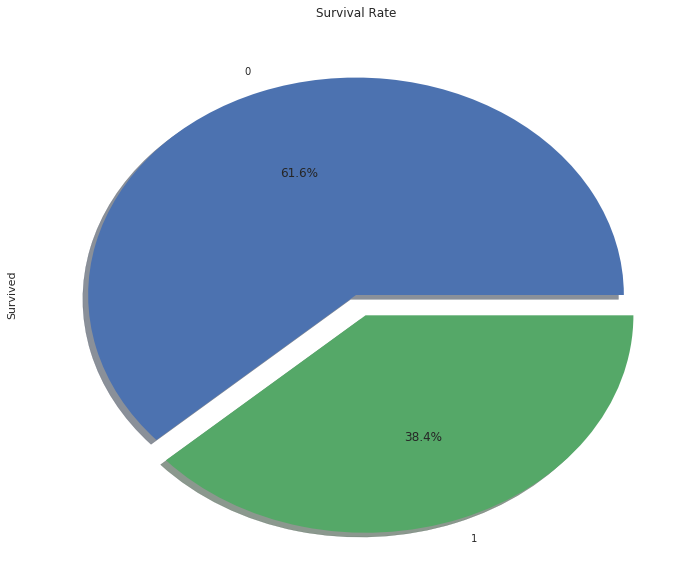

In [12]:
# Plotting the Survival Rate of the training sample
f,ax=plt.subplots(figsize=(12,10))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
title('Survival Rate')
plt.show()

The Figure above shows the fraction of survivors (green) and non-survivors (blue) of the disaster. 342 (~38%) of the training set is composed by survivors and 549 (~ 62%) is composed by non-survivors.

## Sex

In [13]:
# In this section we will explore the survival based on the person's gender. 
# We start by counting the number of survivors and non-survivors by gender using a pivot table.

surv_sex = df.pivot_table(index='Survived',
                                columns='Sex', aggfunc='size')
surv_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


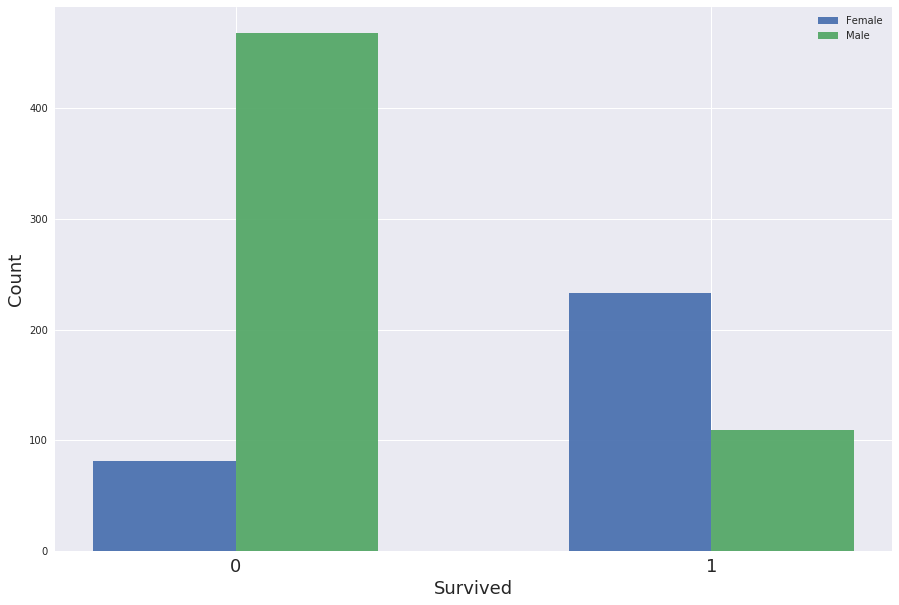

In [14]:
# Plot the number of survivors and non-survivors according to sex.
fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3
objects=list(surv_sex.index)
index=np.arange(len(objects))

rects1 = plt.bar(index, surv_sex['female'], bar_width,alpha=0.95, label='Female',color='b')
rects2 = plt.bar(index+bar_width, surv_sex['male'], bar_width,alpha=0.95, label='Male',color='g')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Survived', fontsize=18)
plt.legend()
plt.show()

There are 577 men (65%) and 314 women (35%) in the training set. 

As expected, the fraction of females (~75%) who survived are much larger than the fraction of males (~20%). 

Among the survivors, 68% were female and 32% were male.    

## Age

As a first approach we will exclude all rows for which the Age is missing.

In [15]:
# Dropping rows that do not have data for the Age variable
surv   = df.loc[:][df.Survived==1]  # Survived
n_surv = df.loc[:][df.Survived==0]  # Did not survived

surv_c=surv.dropna(subset=['Age'])
n_surv_c=n_surv.dropna(subset=['Age'])
n_surv_c.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,424.000000,424.0,424.000000,424.000000,424.000000,424.000000,424.000000
mean,442.299528,0.0,2.485849,30.626179,0.525943,0.365566,22.965456
std,264.739548,0.0,0.743633,14.172110,1.044760,0.878341,31.448825
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,200.750000,0.0,2.000000,21.000000,0.000000,0.000000,7.895800
50%,436.000000,0.0,3.000000,28.000000,0.000000,0.000000,11.887500
75%,683.250000,0.0,3.000000,39.000000,1.000000,0.000000,26.550000
max,891.000000,0.0,3.000000,74.000000,5.000000,6.000000,263.000000


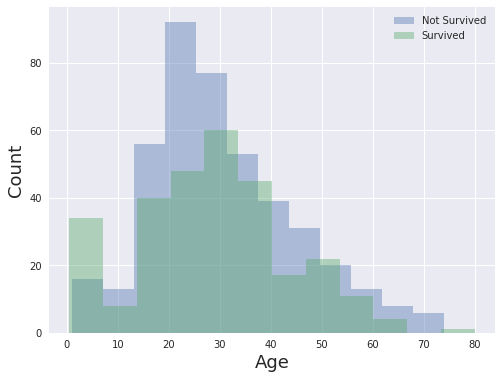

In [16]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(n_surv_c.Age,bins=12, kde=False,label="Not Survived")
sns.distplot(surv_c.Age,bins=12, kde=False,color='g',label="Survived")

plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend()

The plot above shows that, while the majority of non-survivors were ~ 25 years old, most survivors were ~ 30 years old. It also shows another pick of survival for children, as expected. For ages around 50 there is a small increase in the fraction of survivors, but not as significant as the pick around age 5.  

In [17]:
# Checking the distribution of ages among survivors and non survivors of different genders
surv_f   = df.loc[:][df.Survived==1][df.Sex=='female']  # Survived
surv_m   = df.loc[:][df.Survived==1][df.Sex=='male']
n_surv_f   = df.loc[:][df.Survived==0][df.Sex=='female']  # Not Survived
n_surv_m   = df.loc[:][df.Survived==0][df.Sex=='male']
# Dropping the rows that do not have data for the variable age.
surv_cf=surv_f.dropna(subset=['Age'])
surv_cm=surv_m.dropna(subset=['Age'])
n_surv_cf=n_surv_f.dropna(subset=['Age'])
n_surv_cm=n_surv_m.dropna(subset=['Age'])

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


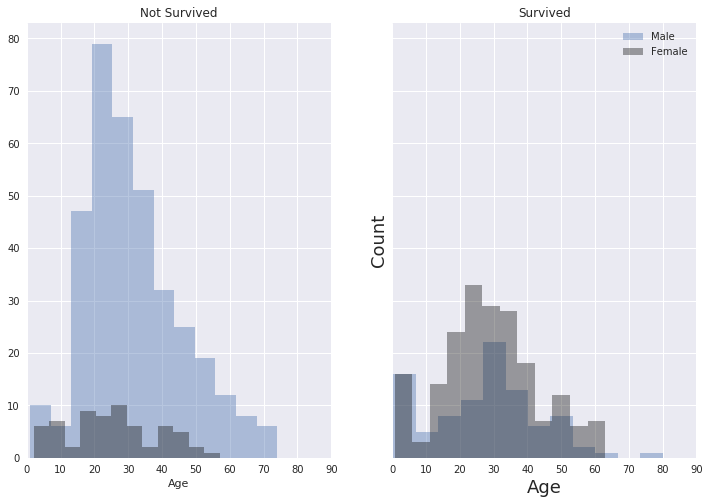

In [18]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,2,figsize=(12, 8),sharex=True, sharey=True)
sns.distplot(n_surv_cm.Age,ax=axes[0],bins=12, kde=False,label="Male")
sns.distplot(n_surv_cf.Age,ax=axes[0],bins=12, kde=False,label="Female",color='k')
sns.distplot(surv_cm.Age,ax=axes[1],bins=12, kde=False,label="Male")
sns.distplot(surv_cf.Age,ax=axes[1],bins=12, kde=False,label="Female",color='k')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlim(0,90)
axes[0].set_title('Not Survived')
axes[1].set_title('Survived')
plt.legend()
plt.show()

The Figure on the left-hand side shows the age distributions for females and males who did not survive. 

It appears that the distribution for females has three picks: one for ages smaller than 10, one for ages between 15 and 35 and one for ages between 40 and 50. 

The Figure on the right-hand side shows the age distributions for females and males who survived.

There is a shift in age towards smaller values for the female distribution. In addition, there is a pick in both female and male distribution for ages smaller than 10. 


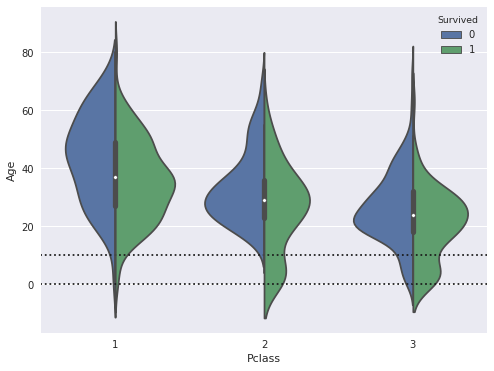

In [19]:
# Violin plot of age as a function of Social Class
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")

We can notice from the Figure above that there are not many children belonging to the first class in comparison to second and third classes. In addition, Most of second and third classes children survived. This shows the advantages of being a child for the survival. 

### What the variable Title can tell us about the ages?

In [20]:
# Finding the location for each "Title" using the entire sample
title_mr   = df.loc[:][df.Title=='Mr']
title_ms   = df.loc[:][df.Title=='Miss']
title_mrs   = df.loc[:][df.Title=='Mrs']
title_ma   = df.loc[:][df.Title=='Master']
title_ot   = df.loc[:][df.Title=='Other']

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


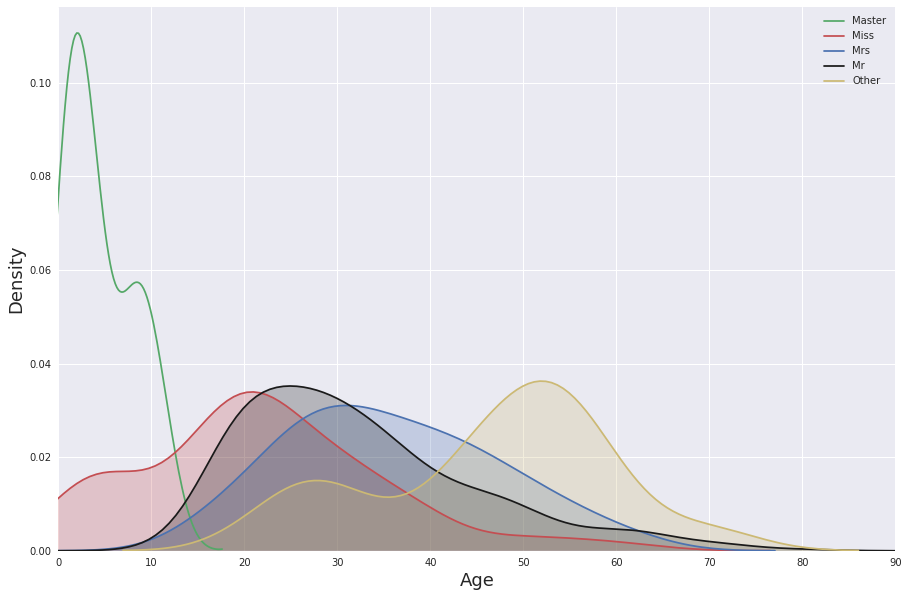

In [21]:
#Plotting the Age distribution per title
f, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(title_ma.Age, shade=False, color='g',legend=True,label="Master")
sns.kdeplot(title_ms.Age, shade=True,color='r',label="Miss")
sns.kdeplot(title_mrs.Age, shade=True,color='b',label="Mrs")
sns.kdeplot(title_mr.Age, shade=True,color='k',label="Mr")
sns.kdeplot(title_ot.Age, shade=True,color='y',label="Other")
plt.xlim(0,90)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.show()

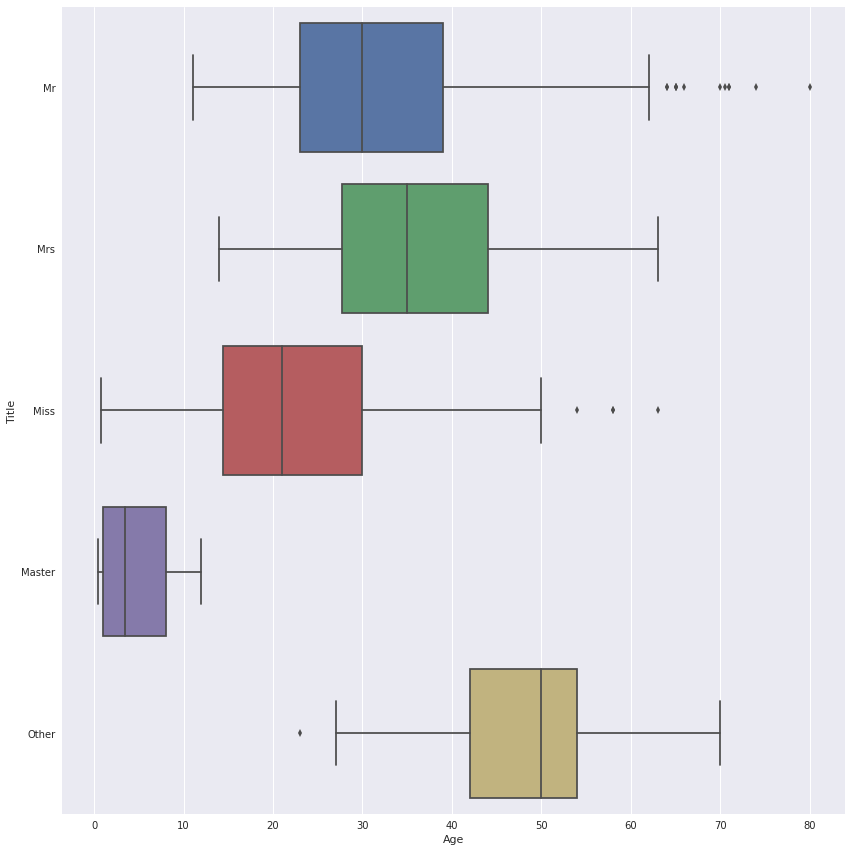

In [22]:
# Box plot with the ages per Title
sns.factorplot('Age','Title',data=df,kind='box',size=12)

It is clear that the distributions are very different among titles. 

Masters are young with ages smaller than 20.

The misses, as expected, are mainly comprised by children and women with ages below 30.

Most married women have ages between 25 and 50.

Most misters have ages smaller than 40.

The title **Other** is comprised by a larger population of older men (age > 40) and a smaller population of men with ages between 20 and 35.  

In the light of the behaviour seen in the two Figures above, one might attemp to introduce a new categorical variable for the ages: 

**Child**: ages below 15

**Young adult**: ages between 15 and 25

**Adult**: ages between 25 and 40

**Senior**: ages above 40

This variable could replace the variable **age** in the analysis and the title could be used to assign the record that do not have ages to the age class. 

Later, we might train the classifier in 2 cases to test whether this new variable would help improving the model:

1) Case one - Exclude rows with missing ages and train the model using the age variable

2) Case two - Assign an age class to the records and use all records to train the model

In [23]:
# Defining the new class based on the age and title: 
def nova_v(data,ar_ou):
    ar_in1=data['Age']
    ar_in2=data['Title']   
    nulo=ar_in1.isnull()
    nulo_a=ar_in1.loc[:][nulo==True]
    for i in range(0,len(ar_in1)):   
        if (ar_in1[i] <= 15.0):                       # If age is present, use Age to create the age class
#        if (ar_in1[i] <= 10.0):                       # If age is present, use Age to create the age class            
            ar_ou.append('child')
        elif (ar_in1[i] > 15.0 and ar_in1[i] <= 25.0):
#        elif (ar_in1[i] > 10.0 and ar_in1[i] <= 25.0):            
             ar_ou.append('young adult')
        elif (ar_in1[i] > 25.0 and ar_in1[i] <= 40.0): 
             ar_ou.append('adult')
        elif (ar_in1[i] > 40.0):
             ar_ou.append('senior')
        elif (i in nulo_a and ar_in2[i]=='Master'):   # otherwise, use Title to create the age class
             ar_ou.append('child')
        elif (i in nulo_a and ar_in2[i]=='Mr'):   
             ar_ou.append('adult')
        elif (i in nulo_a and ar_in2[i]=='Miss'):
             ar_ou.append('young adult')
        elif (i in nulo_a and ar_in2[i]=='Mrs'):   
             ar_ou.append('adult')
        elif (i in nulo_a and ar_in2[i]=='Other'):     
             ar_ou.append('senior')
 

In [24]:
# Call the function to define the new class: **Aclass**
dummy=[]
nova_v(df,dummy)

dummy=pd.Series(dummy,index=df.index)
df['Aclass']=dummy.values
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Aclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,senior
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,child


In [25]:
# In this section we will explore the survival based on the person's age using the variable Aclass. 
surv_age = df.pivot_table(columns='Survived',
                                index='Aclass', aggfunc='size')
surv_age

Survived,0,1
Aclass,,
adult,260,139
child,36,51
senior,96,55
young adult,157,97


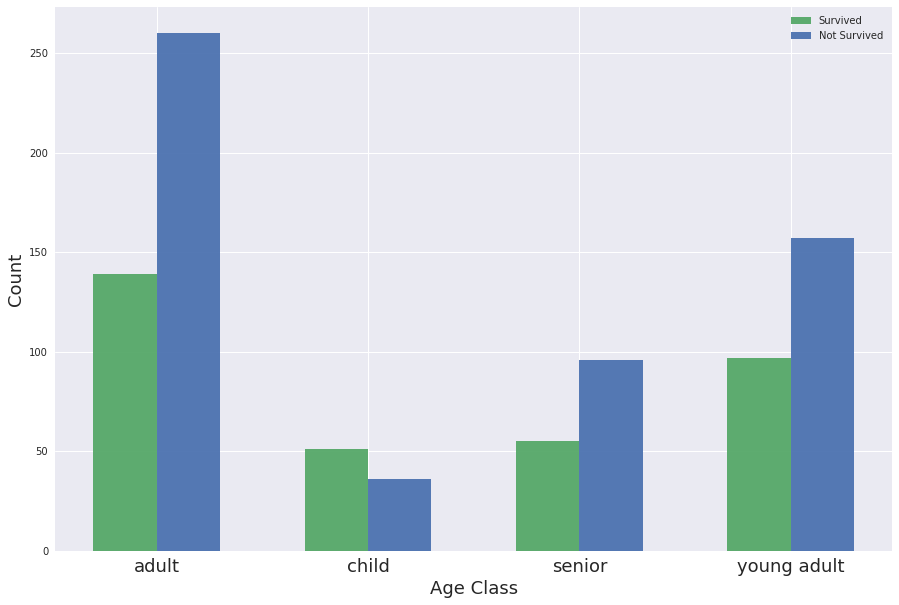

In [26]:
# Plot the number of survivors and non survivors according to the Age class.

fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_age.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_age[1], bar_width,alpha=0.95, label='Survived',color='g')
rects2 = plt.bar(index+bar_width, surv_age[0], bar_width,alpha=0.95, label='Not Survived',color='b')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Age Class', fontsize=18)
plt.legend()
plt.show()

It can be seen in the Figure above that only the class **child** has more survivors than non-survivors.

In [27]:
# Counting the number of survivors and non-survivors based on Sex and Age Class: 
surv_a_s = df.pivot_table(columns='Survived',
                                index=['Sex','Aclass'], aggfunc='size')
surv_a_s

Survived              0   1
Sex    Aclass              
female adult         21  87
       child         15  28
       senior        11  37
       young adult   34  81
male   adult        239  52
       child         21  23
       senior        85  18
       young adult  123  16

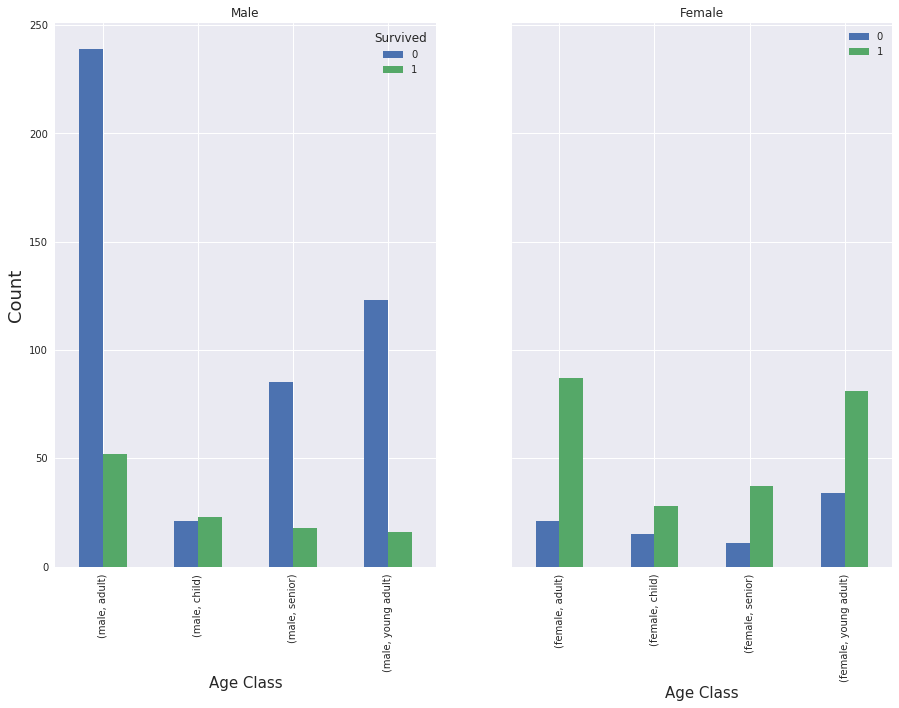

In [28]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,2,figsize=(12, 10),sharey=True)
# Plot the number of survivors and non survivors according to the Age class.
surv_a_s.loc[['male']].plot.bar(figsize=(15, 10),ax=axes[0])
surv_a_s.loc[['female']].plot.bar(figsize=(15, 10),ax=axes[1])

axes[0].set_title('Male')
axes[1].set_title('Female')
axes[0].set_ylabel('Count',fontsize=18)
axes[0].set_xlabel('Age Class',fontsize=15)
axes[1].set_xlabel('Age Class',fontsize=15)

plt.legend()
plt.show()

In the Figures above the blue bars represent the non-survivors and the green bars the survivors. They show that, even though being a child has its advantages, being a woman is always more advantageous, since their survival was less dependent on the ages. 

## Social Class

In [29]:
# In this section we will explore the survival based on the person's class using the variable Pclass. 
surv_class = df.pivot_table(columns='Survived',
                                index='Pclass', aggfunc='size')
surv_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


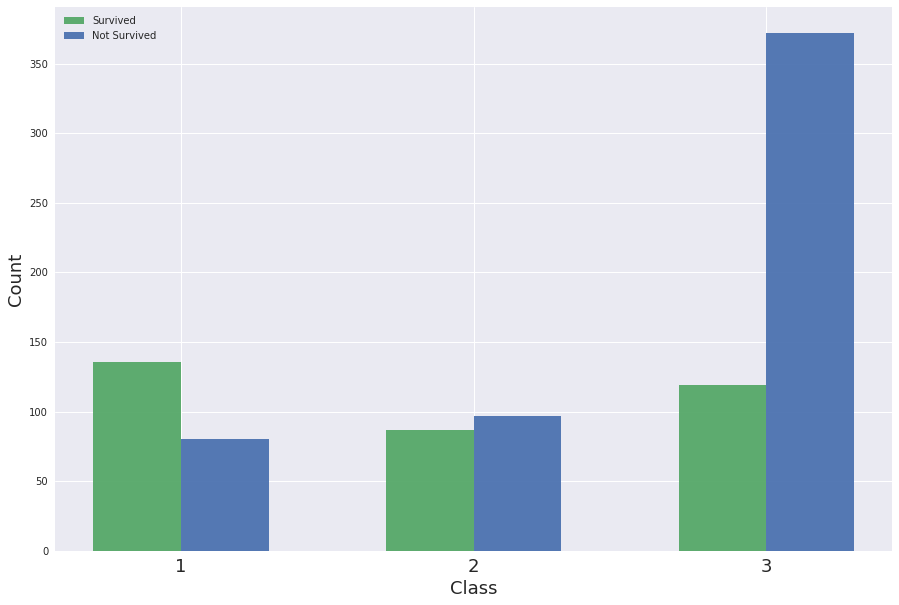

In [30]:
# Plot the number of survivors and non survivors according to the Social class.

fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_class.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_class[1], bar_width,alpha=0.95, label='Survived',color='g')
rects2 = plt.bar(index+bar_width, surv_class[0], bar_width,alpha=0.95, label='Not Survived',color='b')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Class', fontsize=18)
plt.legend()
plt.show()

Not surprisingly, only first class passengers have more survivors than non-survivors. This is possible, not only, because they had special treatment, but also because the cabins for the second and third class were closer to the bottom of the ship as can be seen in the Figure below:

![title](1428232264413.png)

Unfortunately most records do not show the cabin number. We could expect a correlation between the deck in which the cabin was located and the survival, since the collision happened at night when most passengers were sleeping. 

In [31]:
# Counting the number of survivors and non-survivors based on Sex and Social Class: 
surv_a_p = df.pivot_table(columns='Survived',
                                index=['Sex','Pclass'], aggfunc='size')
surv_a_p

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


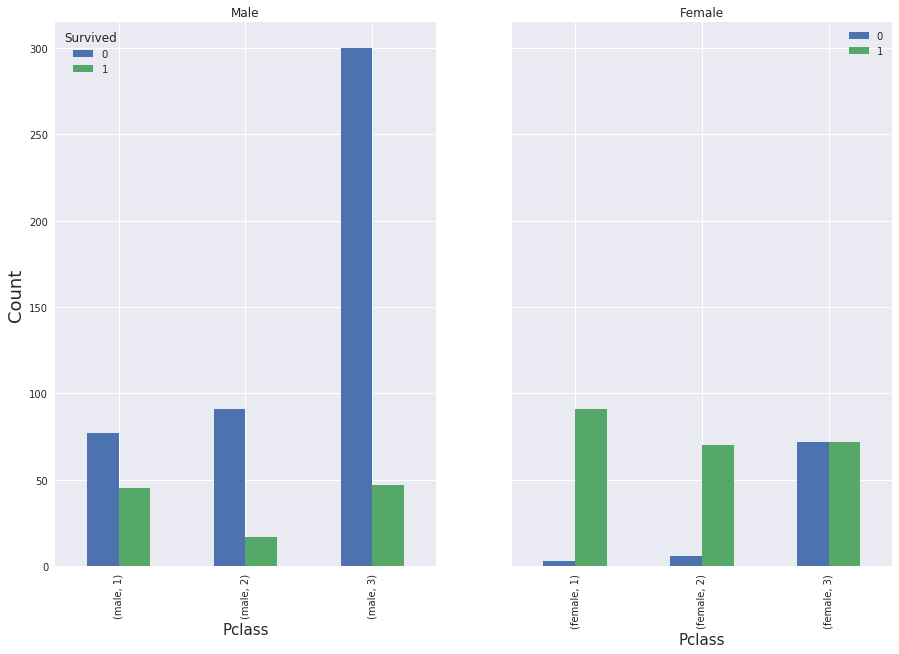

In [32]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,2,figsize=(15, 10),sharey=True)
objects=[1,2,3]
index = np.arange(len(objects))


# Plot the number of survivors and non survivors according to the Social class.
surv_a_p.ix[['male']].plot.bar(figsize=(15, 10),ax=axes[0])
surv_a_p.ix[['female']].plot.bar(figsize=(15, 10),ax=axes[1])

axes[0].set_title('Male')
axes[1].set_title('Female')
axes[0].set_ylabel('Count',fontsize=18)
axes[0].set_xlabel('Pclass',fontsize=15)
axes[1].set_xlabel('Pclass',fontsize=15)

plt.legend()
plt.show()

The Figure above shows an interesting result: The majority of the women who died belonged to the third class. Furthermore, 50% of the third class women died and 50% survived. Also, most of the third class is composed by males.  

## Family Size

In [33]:
# Counting the number of survivors and non survivors by number of siblings or spouse:
surv_si = df.pivot_table(columns='Survived',
                                index='SibSp', aggfunc='size')
surv_si

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


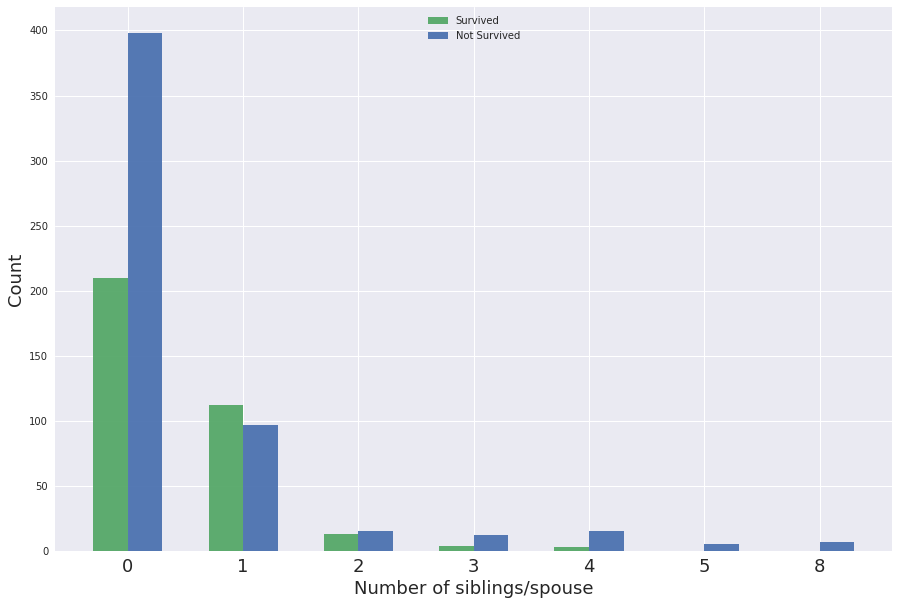

In [34]:
# Plot the number of survivors and non survivors according to the number of siblings or spouse.
fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_si.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_si[1], bar_width,alpha=0.95, label='Survived',color='g')
rects2 = plt.bar(index+bar_width, surv_si[0], bar_width,alpha=0.95, label='Not Survived',color='b')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Number of siblings/spouse', fontsize=18)
plt.legend()
plt.show()

Only people accompanied by one sibling or spouse have the number of survivors larger than the number of  non survivors. 

In [35]:
# Counting the number of survivors and non survivors by number of parents or children:
surv_pa = df.pivot_table(columns='Survived',
                                index='Parch', aggfunc='size')
surv_pa

Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


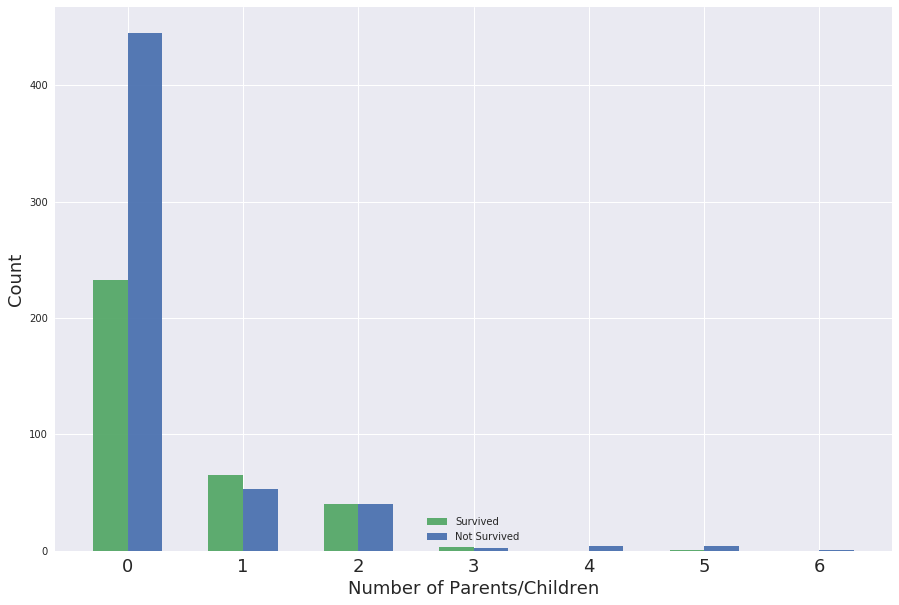

In [36]:
# Plot the number of survivors and non survivors according to the number of parents or children.
fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_pa.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_pa[1], bar_width,alpha=0.95, label='Survived',color='g')
rects2 = plt.bar(index+bar_width, surv_pa[0], bar_width,alpha=0.95, label='Not Survived',color='b')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Number of Parents/Children', fontsize=18)
plt.legend()
plt.show()

As in the case of siblings and spouses, only people accompanied by one parent or child have the number of survivors larger than the number of non survivors.

We can determine family size by combining the number of siblings or spouses and the number of parents or children.

In [37]:
# Create new variable Fsize
df['Fsize'] = df['SibSp']+df['Parch'] 
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Aclass,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,adult,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,senior,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,adult,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,child,1


In [38]:
pd.value_counts(df['Fsize'],dropna=True,sort=False)

0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Fsize, dtype: int64

Define a new class called family that follows the rule:

Fsize = 0 --> Family = alone

Fsize = 1 --> Family = couple

Fsize = 2 --> Family = small family

Fsize >=3 --> Family = large family

In [39]:
# Defining the new class based on Fsize: 
def nova_v2(data,ar_ou):
    ar_in1=data['Fsize']
    nulo=ar_in1.isnull()
    nulo_a=ar_in1.loc[:][nulo==True]
    for i in range(0,len(ar_in1)):
        if (ar_in1[i] < 1):
            ar_ou.append('alone')
        elif (ar_in1[i] > 0 and ar_in1[i] < 2):
             ar_ou.append('couple')
        elif (ar_in1[i] > 1 and ar_in1[i] < 3): 
             ar_ou.append('small family')
        elif (ar_in1[i] >= 3):
             ar_ou.append('large family')


In [40]:
# Call the function to define the new class: **Family**
dummy=[]
nova_v2(df,dummy)

dummy=pd.Series(dummy,index=df.index)
df['Family']=dummy.values
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Aclass,Fsize,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young adult,1,couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult,1,couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult,0,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult,1,couple
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult,0,alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,adult,0,alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,senior,0,alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,child,4,large family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,adult,2,small family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,child,1,couple


In [41]:
# Counting the number of survivors and non survivors by Family type:
surv_fa = df.pivot_table(columns='Survived',
                                index='Family', aggfunc='size')
surv_fa

Survived,0,1
Family,,
alone,374,163
couple,72,89
large family,60,31
small family,43,59


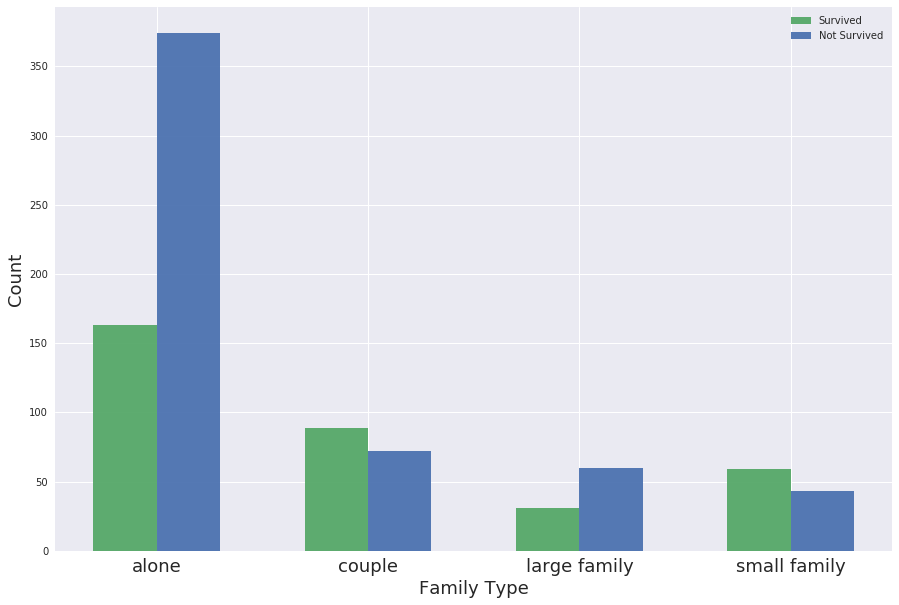

In [42]:
# Plot the number of survivors and non survivors according to the Family type.

fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_fa.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_fa[1], bar_width,alpha=0.95, label='Survived',color='g')
rects2 = plt.bar(index+bar_width, surv_fa[0], bar_width,alpha=0.95, label='Not Survived',color='b')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Family Type', fontsize=18)
plt.legend()
plt.show()


Only family type **couple** and **small family** have more survivors than non-survivors in the sample.

In [43]:
# In this section we will explore the survival based on the person's family type using the variable Family. 
surv_a_f = df.pivot_table(columns='Survived',
                                index=['Sex','Family'], aggfunc='size')
surv_a_f

Survived               0   1
Sex    Family               
female alone          27  99
       couple         16  71
       large family   27  25
       small family   11  38
male   alone         347  64
       couple         56  18
       large family   33   6
       small family   32  21

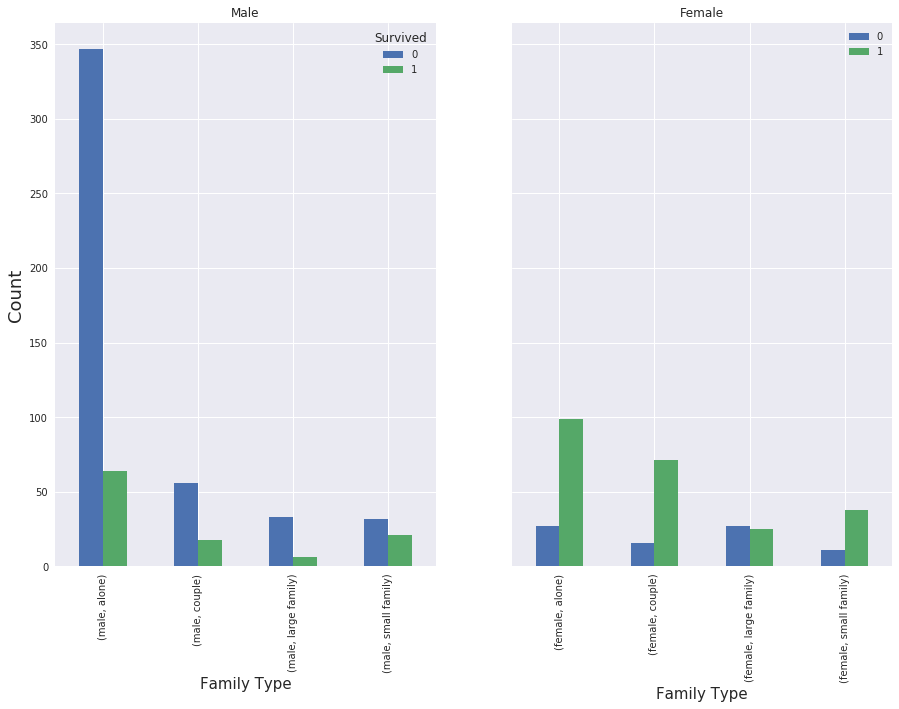

In [44]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,2,figsize=(15, 10),sharey=True)
# Plot the number of survivors and non survivors according to the Family Type.
surv_a_f.loc[['male']].plot.bar(figsize=(15, 10),ax=axes[0])
surv_a_f.loc[['female']].plot.bar(figsize=(15, 10),ax=axes[1])

axes[0].set_ylabel('Count',fontsize=18)
axes[0].set_title('Male')
axes[1].set_title('Female')
axes[0].set_xlabel('Family Type',fontsize=15)
axes[1].set_xlabel('Family Type',fontsize=15)
plt.legend()
plt.show()

The Figures above show the number of survivors and non-survivors for each family type. Most men in large families did not survive the disaster. Naturally, the women in a couple survived more than their partner. Poor Jack! =P 

## Port of Embarkation

In [45]:
# Counting the number of survivors and non survivors by port of embarkation:
surv_port = df.pivot_table(columns='Survived',
                                index='Embarked', aggfunc='size')
surv_port

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


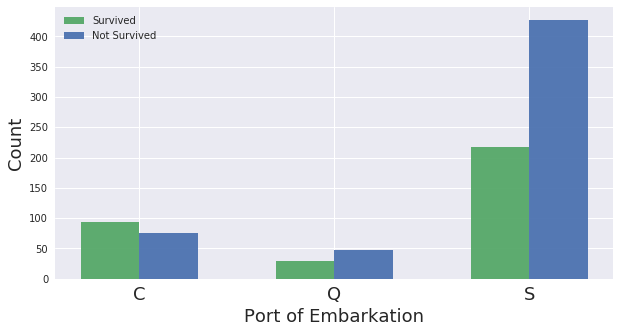

In [46]:
# Plot the number of survivors and non survivors according to the port of Embarkation.

fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.3

objects=list(surv_port.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_port[1], bar_width,alpha=0.95, label='Survived',color='g')
rects2 = plt.bar(index+bar_width, surv_port[0], bar_width,alpha=0.95, label='Not Survived',color='b')

plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Port of Embarkation', fontsize=18)
plt.legend()
plt.show()

 The Figure above shows the amount of survivors and non-survivors for each place of embarkation. More people survived than died who embarked in Cherbourg than in the other two ports. 
 
 Since there is no reason for the port of embarkation to influence the odds of survival we will investigate further. 

In [47]:
 # Counting the number of survivors and non survivors by port of embarkation and Sex:
surv_a_e = df.pivot_table(columns='Survived',
                                index=['Sex','Embarked'], aggfunc='size')
surv_a_e

Survived           0    1
Sex    Embarked          
female C           9   64
       Q           9   27
       S          63  140
male   C          66   29
       Q          38    3
       S         364   77

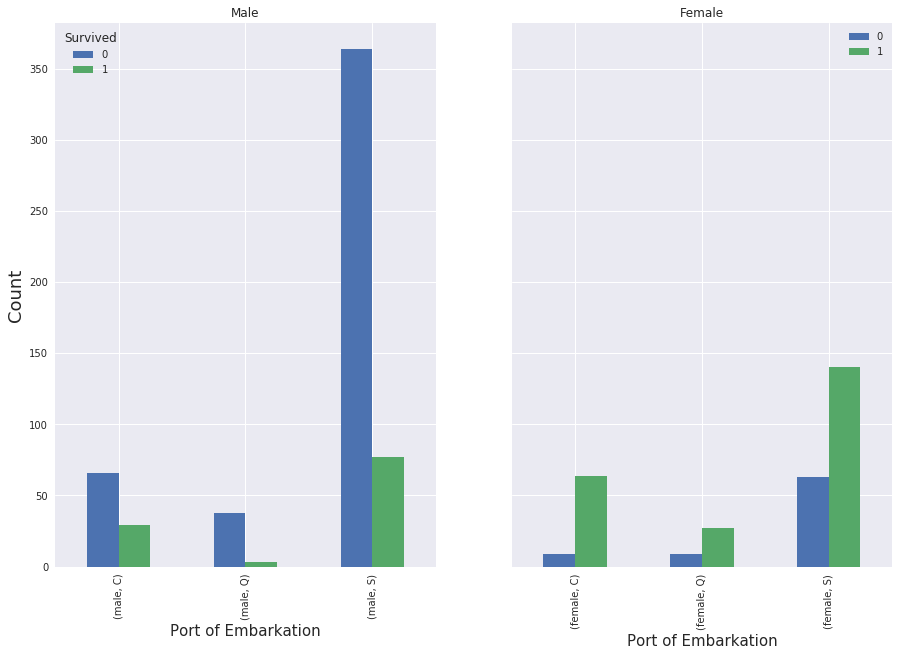

In [48]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,2,figsize=(15, 10),sharey=True)
# Plot the number of survivors and non survivors according to the Port of Embarkation.
surv_a_e.loc[['male']].plot.bar(figsize=(15, 10),ax=axes[0])
surv_a_e.loc[['female']].plot.bar(figsize=(15, 10),ax=axes[1])

axes[0].set_ylabel('Count',fontsize=18)
axes[0].set_title('Male')
axes[1].set_title('Female')
axes[0].set_xlabel('Port of Embarkation',fontsize=15)
axes[1].set_xlabel('Port of Embarkation',fontsize=15)

plt.legend()
plt.show()

The Figure above shows the same behavior seen in all previous variables: Being a woman influenced more the changes of survive the Titanic disaster.

In [49]:
 # Counting the number of survivors and non survivors by port of embarkation and Social class:
surv_p_e = df.pivot_table(columns='Survived',
                                index=['Pclass','Embarked'], aggfunc='size')
surv_p_e

Survived           0   1
Pclass Embarked         
1      C          26  59
       Q           1   1
       S          53  74
2      C           8   9
       Q           1   2
       S          88  76
3      C          41  25
       Q          45  27
       S         286  67

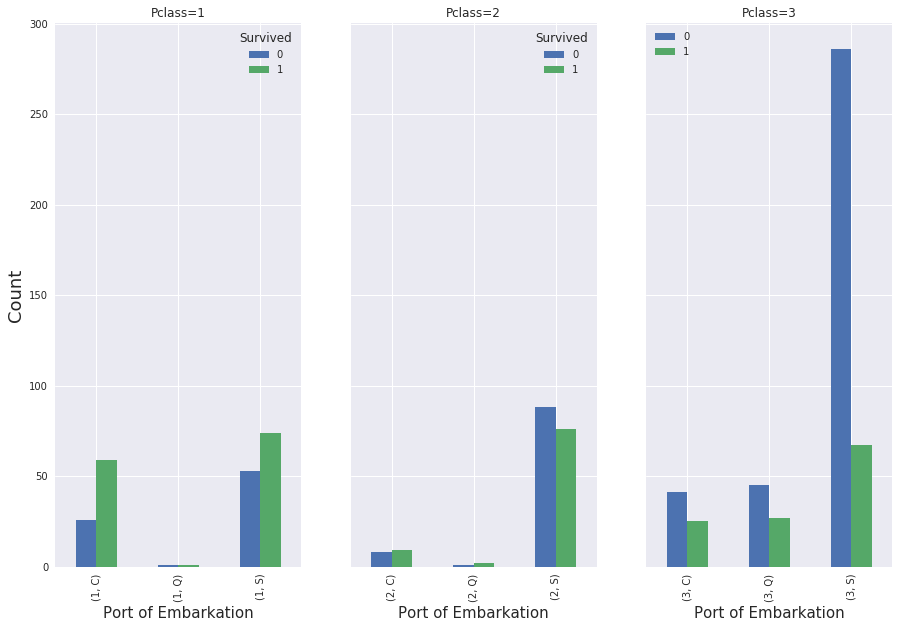

In [50]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,3,figsize=(15, 10),sharey=True)
# Plot the number of survivors and non survivors according to the Port of Embarkation.
surv_p_e.loc[[1]].plot.bar(ax=axes[0])
surv_p_e.loc[[2]].plot.bar(ax=axes[1])
surv_p_e.loc[[3]].plot.bar(ax=axes[2])

axes[0].set_xlabel('Port of Embarkation',fontsize=15)
axes[1].set_xlabel('Port of Embarkation',fontsize=15)
axes[2].set_xlabel('Port of Embarkation',fontsize=15)
axes[0].set_ylabel('Count',fontsize=18)
axes[0].set_title('Pclass=1')
axes[1].set_title('Pclass=2')
axes[2].set_title('Pclass=3')
plt.legend()
plt.show()

The Figures above show the amount of survivors and non-survivors for each port depending on the social class. 
It is clear that almost no first and second classes passengers embarqued at Queenstown. There were also fewer second class passengers who embarked at Cherbourg.

## Deck

The cabin variable is composed by a letter and a number. The letter indicates the deck where the cabin was located. 

Even though there is information about the cabin for only ~20% of the records, we will create a new variable deck based on cabin to check if there is any interesting pattern. 

In [51]:
# In order to do this we will extract from the variable "Cabin" the letter preceding the number and
# add it to the data frame as a new variable called "Deck"
df['Deck'] = df.Cabin.str.extract('([A-Za-z])', expand=False) 
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Aclass,Fsize,Family,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young adult,1,couple,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult,1,couple,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult,0,alone,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult,1,couple,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult,0,alone,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,adult,0,alone,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,senior,0,alone,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,child,4,large family,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,adult,2,small family,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,child,1,couple,NaN


In [52]:
# Re-defining the survivors and non survivors frame:
surv   = df.loc[:][df.Survived==1]  # Survived
n_surv = df.loc[:][df.Survived==0]  # Did not survived
surv.describe()
n_surv.describe()
# Counting the number of survivors and non survivors by Deck:
conta_dc_s=pd.value_counts(surv['Deck'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_dc_ns=pd.value_counts(n_surv['Deck'],dropna=True,sort=False) # of variable "Deck"
conta_dc_ns.index

Index(['D', 'G', 'C', 'F', 'B', 'E', 'T', 'A'], dtype='object')

In [53]:
# Create a not survived Serie
n_surv_dc=pd.Series(conta_dc_ns.values,index=conta_dc_ns.index)
# Create a data frame with the survivors 
surv_dc=pd.DataFrame(conta_dc_s.values,index=conta_dc_s.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_dc['Not Survived']=n_surv_dc
surv_dc
# Sorting in alphabetical order
b = sorted(surv_dc.index)
surv_dc=surv_dc.loc[b]
surv_dc

,Survived,Not Survived
A,7,8
B,35,12
C,35,24
D,25,8
E,24,8
F,8,5
G,2,2


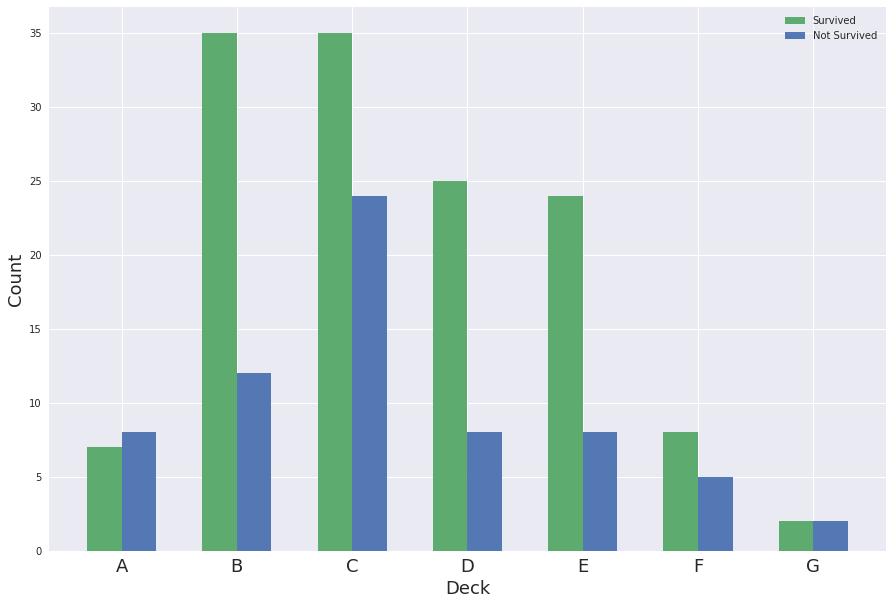

In [54]:
# Plot the number of survivors and non survivors according to the Deck.

fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_dc.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_dc['Survived'], bar_width,alpha=0.95, label='Survived',color='g')
rects2 = plt.bar(index+bar_width, surv_dc['Not Survived'], bar_width,alpha=0.95, label='Not Survived',color='b')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Deck', fontsize=18)
plt.legend()
plt.show()


The Figure above shows no dependence of survival with the cabin number. This lack of dependence is the result of an incomplete sample, since only 20% of the sample has this information. Furthermore, 67% of the rows containing the cabin number are from survivors which is the opposite proportion of the entire sample that contains 62% of non-survivors. This means that any conclusion drawn from this small sample is most likely incorrect. However, the fact that we have information about the deck mostly for those people who survived, maybe we can use the lack or not of this information as a feature.  

In [55]:
# Creating a feature Deck_known: If true, we have information for the Deck, if false we do not have this information.
df['Deck_known'] = df['Cabin'].isnull() == False

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Aclass,Fsize,Family,Deck,Deck_known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young adult,1,couple,NaN,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult,1,couple,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult,0,alone,NaN,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult,1,couple,C,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult,0,alone,NaN,False


In [57]:
# Average fare and fare per person for each Deck and Pclass
surv_dec = df.pivot_table(values=['Fare'],
                                index=['Deck','Pclass'], aggfunc='mean')
surv_dec

Fare
Deck Pclass            
A    1        39.623887
B    1       113.505764
C    1       100.151341
D    1        63.324286
     2        13.166675
E    1        55.740168
     2        11.587500
     3        11.000000
F    2        23.750000
     3        10.611660
G    3        13.581250
T    1        35.500000

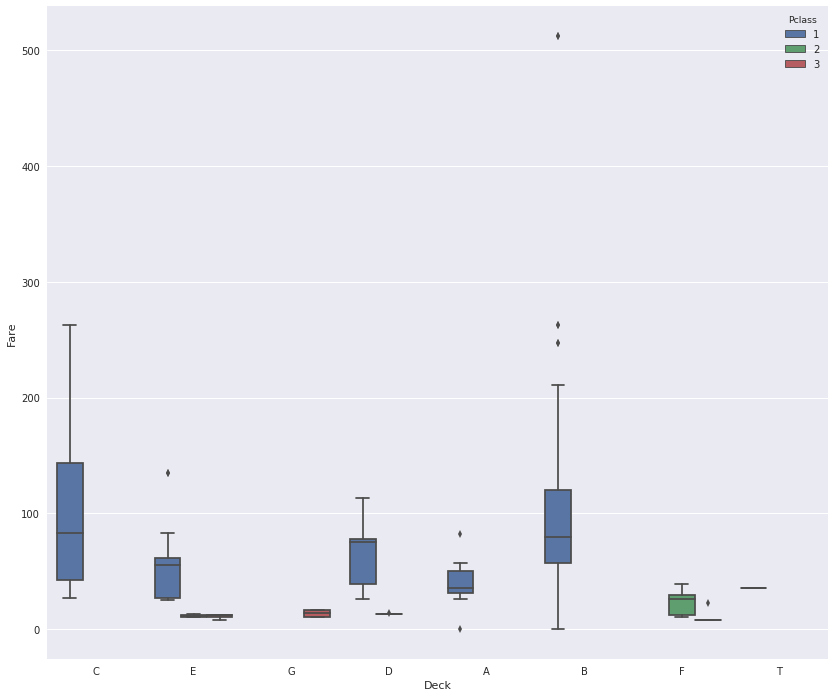

In [58]:
# Box plot with the fare per Deck
fig, axis = plt.subplots(1,1,figsize=(14,12))
sns.boxplot(x = 'Deck', y = 'Fare', hue='Pclass', data = df)

## Fare

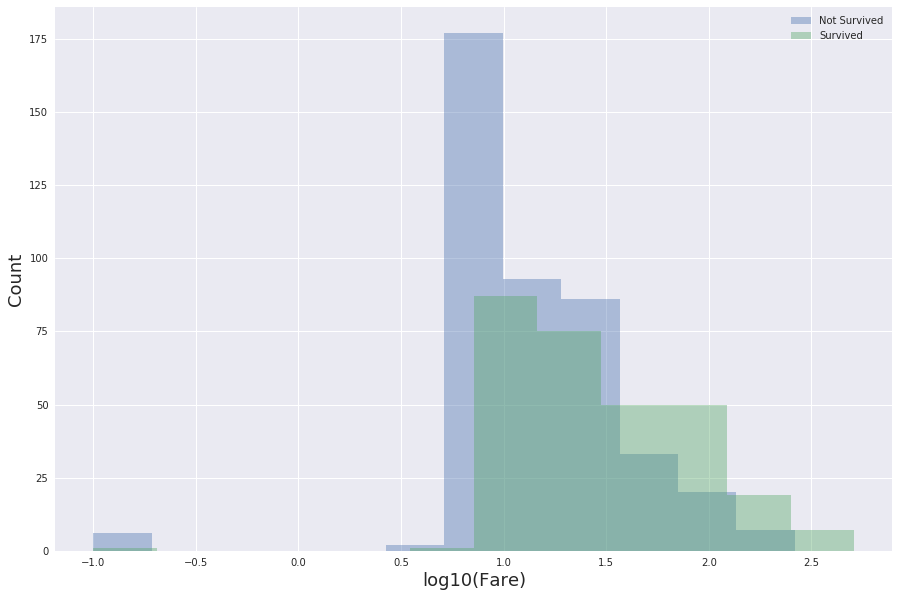

In [59]:
# Fare Distributions:
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(log10(n_surv_c.Fare+0.1),bins=12, kde=False,label="Not Survived")
sns.distplot(log10(surv_c.Fare+0.1),bins=12, kde=False,color='g',label="Survived")
#sns.distplot(n_surv_c.Fare,bins=12, kde=False,label="Not Survived")
#sns.distplot(surv_c.Fare,bins=12, kde=False,color='g',label="Survived")

plt.xlabel('log10(Fare)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend()
plt.show()

The Figure above shows that while a larger proportion of people who paid fares smaller than 50 died, a larger proportion of people who paid fares larger than 50 survived.  

Fare is likely a function of the family size, the location in the ship (Deck), the port of embarkation, and the Pclass.  

In [60]:
# Let's divide the fare into four bins:
df['FareBin'] = pd.qcut(df['Fare'], 4)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Aclass,Fsize,Family,Deck,Deck_known,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young adult,1,couple,NaN,False,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult,1,couple,C,True,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult,0,alone,NaN,False,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult,1,couple,C,True,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult,0,alone,NaN,False,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,adult,0,alone,NaN,False,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,senior,0,alone,E,True,"(31.0, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,child,4,large family,NaN,False,"(14.454, 31.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,adult,2,small family,NaN,False,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,child,1,couple,NaN,False,"(14.454, 31.0]"


In [61]:
# We start separating the population that survived from those that did not survive.
surv   = df.loc[:][df.Survived==1]  # Survived
n_surv = df.loc[:][df.Survived==0]  # Did not survived

# Counting the number of survivors and non survivors by FareBin:
conta_fb_s=pd.value_counts(surv['FareBin'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_fb_ns=pd.value_counts(n_surv['FareBin'],dropna=True,sort=False) # of variable "FareBin"
conta_fb_ns.index

CategoricalIndex([(-0.001, 7.91], (7.91, 14.454], (14.454, 31.0],
                  (31.0, 512.329]],
                 categories=[(-0.001, 7.91], (7.91, 14.454], (14.454, 31.0], (31.0, 512.329]], ordered=True, dtype='category')

In [62]:
# Create a not survived Serie
n_surv_fb=pd.Series(conta_fb_ns.values,index=conta_fb_ns.index)
# Create a data frame with the survivors 
surv_fb=pd.DataFrame(conta_fb_s.values,index=conta_fb_s.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_fb['Not Survived']=n_surv_fb
surv_fb


,Survived,Not Survived
"(-0.001, 7.91]",44,179
"(7.91, 14.454]",68,156
"(14.454, 31.0]",101,121
"(31.0, 512.329]",129,93


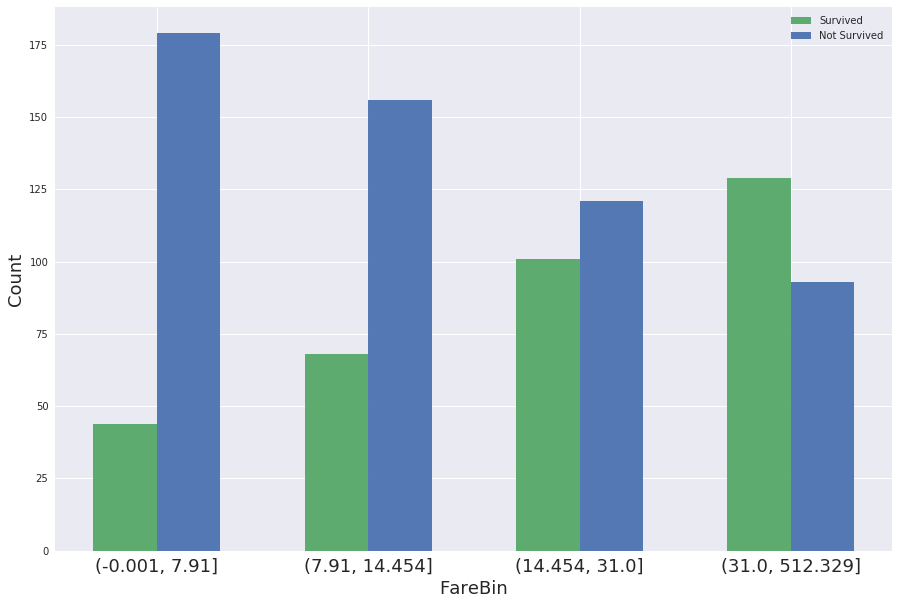

In [63]:
# Plot the number of survivors and non survivors according to the FareBin.

fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_fb.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_fb['Survived'], bar_width,alpha=0.95, label='Survived',color='g')
rects2 = plt.bar(index+bar_width, surv_fb['Not Survived'], bar_width,alpha=0.95, label='Not Survived',color='b')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('FareBin', fontsize=18)
plt.legend()
plt.show()

Those who paid the cheapest fares survived less than those who paid the most expansive fares, as expected. 

In [64]:
 # Counting the number of survivors and non survivors by FareBin and Social class:
surv_f_e = df.pivot_table(columns='Survived',
                                index=['Pclass','FareBin'], aggfunc='size')
surv_f_e

Survived                    0      1
Pclass FareBin                      
1      (-0.001, 7.91]     6.0    NaN
       (14.454, 31.0]    24.0   27.0
       (31.0, 512.329]   50.0  109.0
2      (-0.001, 7.91]     6.0    NaN
       (7.91, 14.454]    53.0   33.0
       (14.454, 31.0]    28.0   42.0
       (31.0, 512.329]   10.0   12.0
3      (-0.001, 7.91]   167.0   44.0
       (7.91, 14.454]   103.0   35.0
       (14.454, 31.0]    69.0   32.0
       (31.0, 512.329]   33.0    8.0

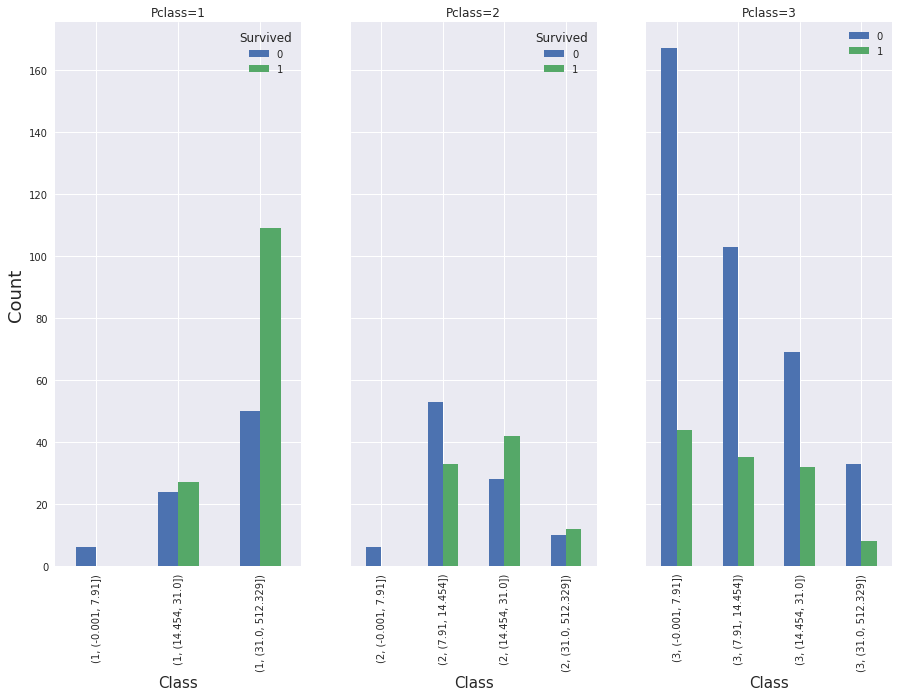

In [65]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,3,figsize=(15, 10),sharey=True)
# Plot the number of survivors and non survivors according to the Social Class.
surv_f_e.loc[[1]].plot.bar(ax=axes[0])
surv_f_e.loc[[2]].plot.bar(ax=axes[1])
surv_f_e.loc[[3]].plot.bar(ax=axes[2])

axes[0].set_xlabel('Class',fontsize=15)
axes[1].set_xlabel('Class',fontsize=15)
axes[2].set_xlabel('Class',fontsize=15)
axes[0].set_ylabel('Count',fontsize=18)
axes[0].set_title('Pclass=1')
axes[1].set_title('Pclass=2')
axes[2].set_title('Pclass=3')
plt.legend()
plt.show()

(0, 300)

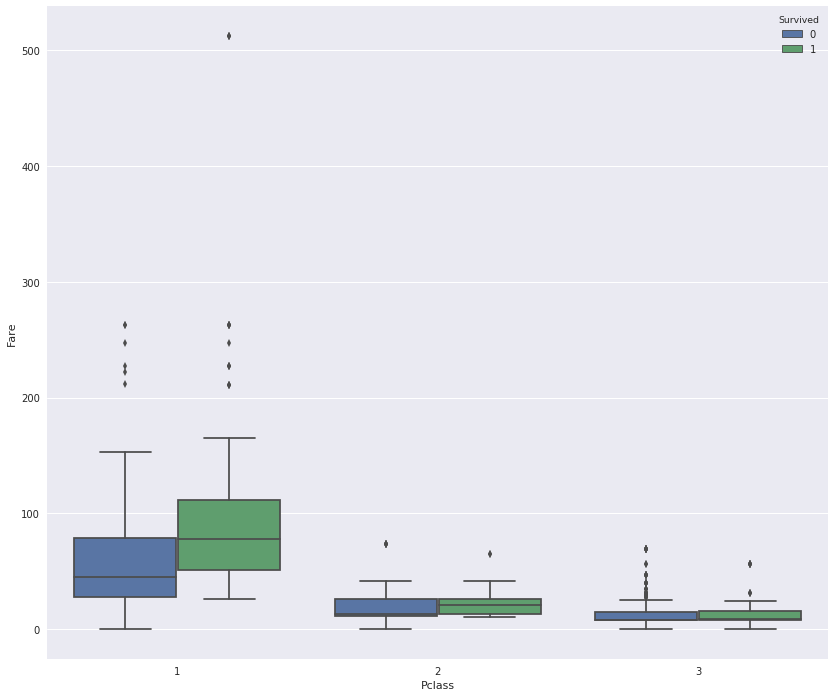

In [66]:
# Box plot with the fare per Social Class
fig, axis = plt.subplots(1,1,figsize=(14,12))
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = df)
ax.set_ylim(0,300)
#axis1.set_title('Pclass vs Fare Survival Comparison')

Naturally, the fees payed by people in the upper class are larger than those in the middle and lower classes. In the upper class case, the people who survived payed more, in average, than those who died. 

In [67]:
 # Counting the number of survivors and non survivors by port of embarkation and FareBin:
surv_f_p = df.pivot_table(columns='Survived',
                                index=['Embarked','FareBin'], aggfunc='size')
surv_f_p

Survived                    0   1
Embarked FareBin                 
C        (-0.001, 7.91]    26   8
         (7.91, 14.454]     9   9
         (14.454, 31.0]    21  21
         (31.0, 512.329]   19  55
Q        (-0.001, 7.91]    31  20
         (7.91, 14.454]     3   3
         (14.454, 31.0]    12   6
         (31.0, 512.329]    1   1
S        (-0.001, 7.91]   122  16
         (7.91, 14.454]   144  56
         (14.454, 31.0]    88  74
         (31.0, 512.329]   73  71

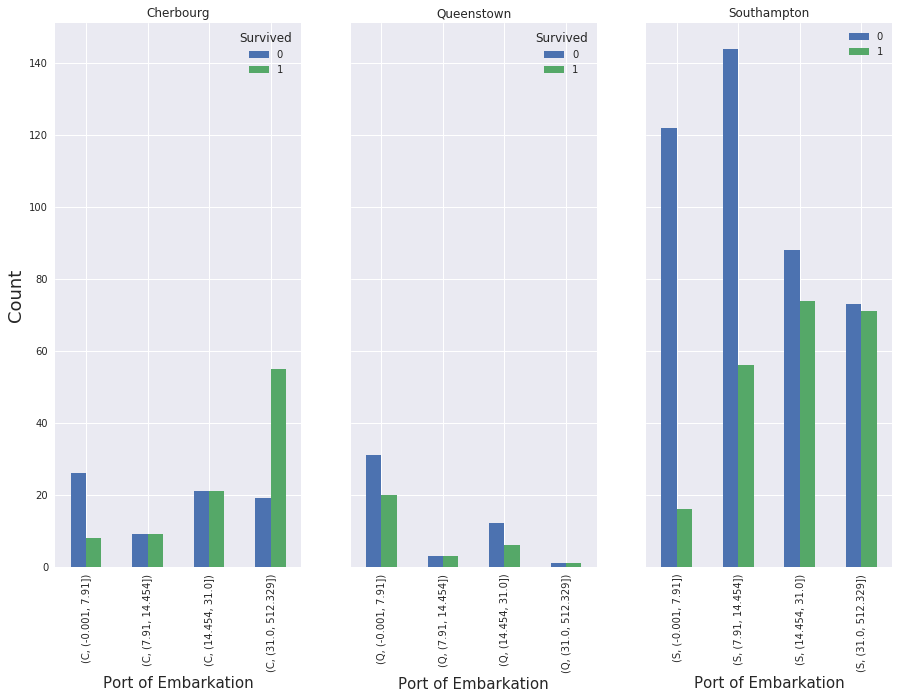

In [68]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,3,figsize=(15, 10),sharey=True)
# Plot the number of survivors and non survivors according to the Port of Embarkation.
surv_f_p.loc[['C']].plot.bar(ax=axes[0])
surv_f_p.loc[['Q']].plot.bar(ax=axes[1])
surv_f_p.loc[['S']].plot.bar(ax=axes[2])

axes[0].set_xlabel('Port of Embarkation',fontsize=15)
axes[1].set_xlabel('Port of Embarkation',fontsize=15)
axes[2].set_xlabel('Port of Embarkation',fontsize=15)
axes[0].set_ylabel('Count',fontsize=18)
axes[0].set_title('Cherbourg')
axes[1].set_title('Queenstown')
axes[2].set_title('Southampton')
plt.legend()
plt.show()


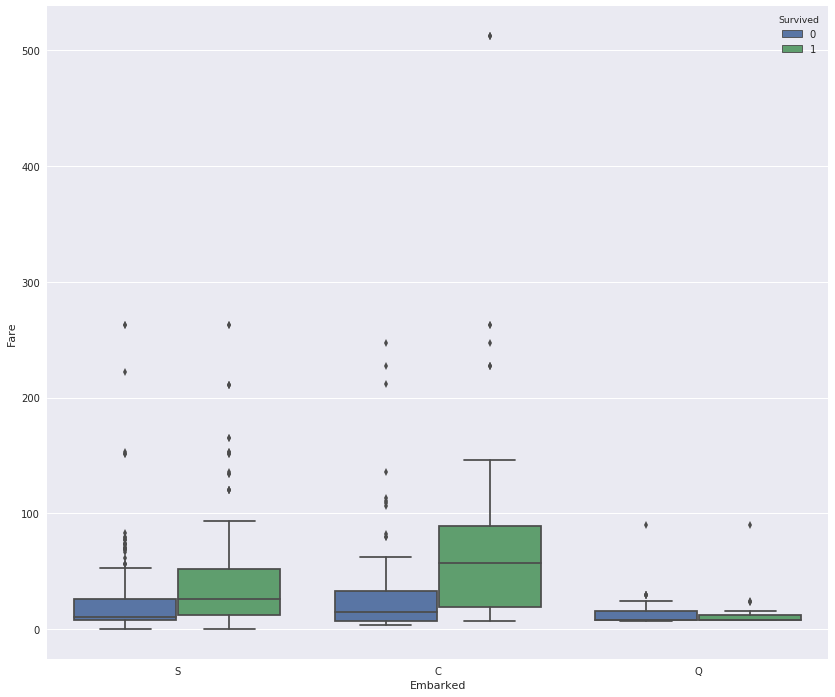

In [69]:
# Box plot with the fare per port of embarkation
fig, axis = plt.subplots(1,1,figsize=(14,12))
sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Survived', data = df)

The lower fare values payed in Queenstown is clearly correlated with the fact that the vast majority of the people who embarked in this port belonged to the lower class.  

In [70]:
 # Counting the number of survivors and non survivors by Family type and FareBin:
surv_f_f = df.pivot_table(columns='Survived',
                                index=['Family','FareBin'], aggfunc='size')
surv_f_f

Survived                          0     1
Family       FareBin                     
alone        (-0.001, 7.91]   168.0  42.0
             (7.91, 14.454]   135.0  52.0
             (14.454, 31.0]    45.0  31.0
             (31.0, 512.329]   26.0  38.0
couple       (-0.001, 7.91]     7.0   2.0
             (7.91, 14.454]    13.0  11.0
             (14.454, 31.0]    33.0  24.0
             (31.0, 512.329]   19.0  52.0
large family (7.91, 14.454]     1.0   1.0
             (14.454, 31.0]    23.0  12.0
             (31.0, 512.329]   36.0  18.0
small family (-0.001, 7.91]     4.0   NaN
             (7.91, 14.454]     7.0   4.0
             (14.454, 31.0]    20.0  34.0
             (31.0, 512.329]   12.0  21.0

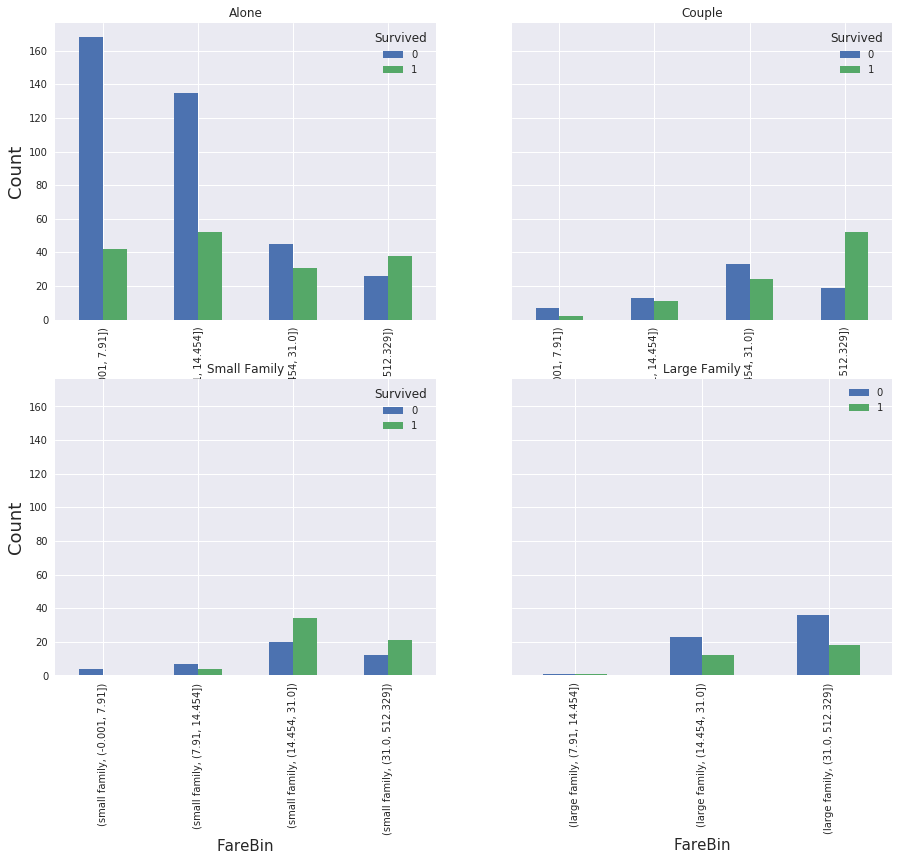

In [71]:
# Plotting the Distributions:
fig,axes=plt.subplots(2,2,figsize=(15, 12),sharey=True)
# Plot the number of survivors and non survivors according to Family Type.
surv_f_f.loc[['alone']].plot.bar(ax=axes[0][0])
surv_f_f.loc[['couple']].plot.bar(ax=axes[0][1])
surv_f_f.loc[['small family']].plot.bar(ax=axes[1][0])
surv_f_f.loc[['large family']].plot.bar(ax=axes[1][1])

axes[1][0].set_xlabel('FareBin',fontsize=15)
axes[1][1].set_xlabel('FareBin',fontsize=15)
axes[0][0].set_ylabel('Count',fontsize=18)
axes[1][0].set_ylabel('Count',fontsize=18)
axes[0][0].set_title('Alone')
axes[0][1].set_title('Couple')
axes[1][0].set_title('Small Family')
axes[1][1].set_title('Large Family')
plt.legend()
plt.show()

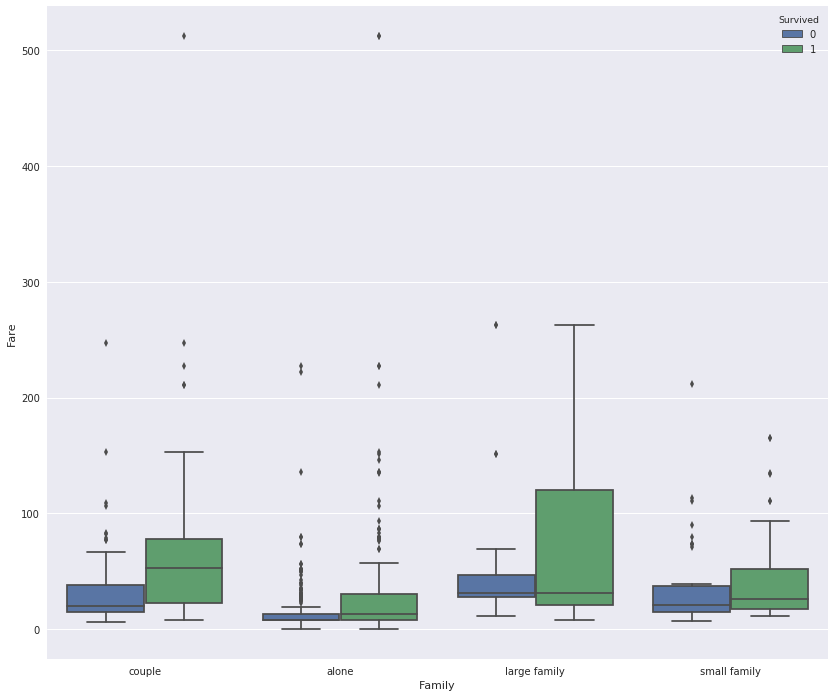

In [72]:
# Box plot with the fare per Family Type
fig, axis = plt.subplots(1,1,figsize=(14,12))
sns.boxplot(x = 'Family', y = 'Fare', hue = 'Survived', data = df)

As expected the fare also depends on the family size. 

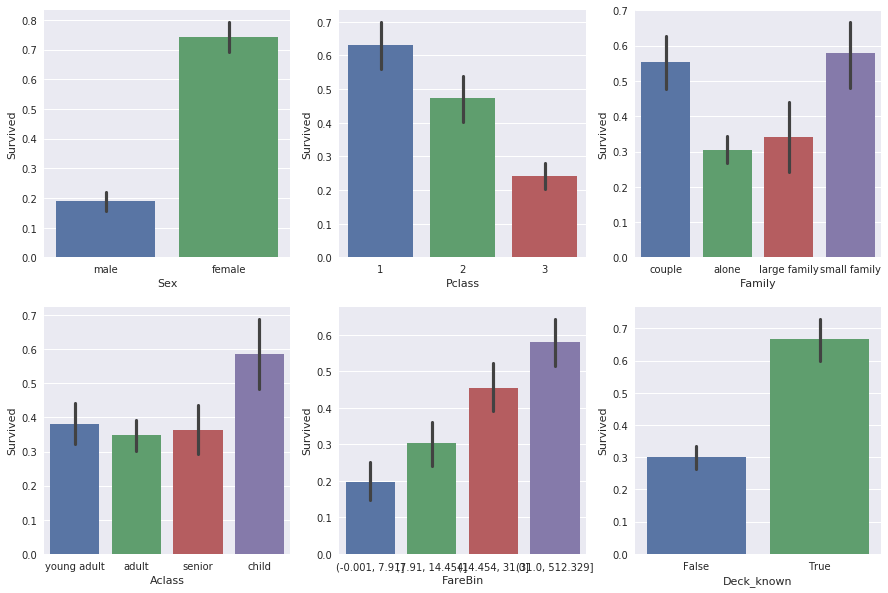

In [73]:
f, ax = plt.subplots(2,3,figsize=(15, 10))
sns.barplot('Sex', 'Survived', data=df,ax=ax[0,0])
sns.barplot('Pclass', 'Survived', data=df,ax=ax[0,1])
sns.barplot('Family', 'Survived', data=df,ax=ax[0,2])
sns.barplot('Aclass', 'Survived', data=df,ax=ax[1,0])
#sns.barplot('SibSp', 'Survived', data=df,ax=ax[0,2])
#sns.barplot('Parch', 'Survived', data=df,ax=ax[1,0])
sns.barplot('FareBin', 'Survived', data=df,ax=ax[1,1])
sns.barplot('Deck_known', 'Survived', data=df,ax=ax[1,2])

The Figure above shows the proportion of people who survived for some of the features analyzed up to now. We can see that, almost 70% of the people with Deck information survived while only 30% of those without this information did.

### Which features should we use in the models?

It is clear that some features are more relevant to determine the survival in the disaster than others. According to the analysis above the selected features are:

**Sex**: This is the feature that seems to result in survival (if female) independently of the others features;

**AClass**: Age has an important influence in determine if a male is going to survive. The age class was chosen instead of Age, because we can use the variable **Title** to derive missing values;

**Pclass**: It is also clear that men in the first class has more chance to survive than their counterparts in second and third classes;

**Family**: The family size appears to have a small influence in the odds of survival, for instance, large families seem to have a smaller chance of survival than couples and small families;

**FareBin**: The fare also has a small influence in the chance of survival. Although this features has a dependence with some of the other features above, we will include it because it probably has information concerning the deck which should influence the odds.

**Deck_known**: Around 70% of the people for which deck information is available survived the disaster. If we assume that this information is known because the survivors could provide them and not because they were found on the records, we can assume that the test sample should contain similar proportion. But it is important to keep this assumption in mind.

### Which features we will discard?

**Name**: This variable was used to derive the **Title** feature;

**Age**: This variable is being discarded just because we are using the age class which can be derived from the variable **age** and the variable **Title**;

**Fare**: This variable is being discarded only because we are using the FareBin instead;

**SibSp** and **Parch**: These features were combined to derive the **Family** feature;

**Ticket**: I was not able to find whether the ticket number had any usefull information, so it is going to be dropped right now;

**Cabin**: This feature is going to be dropped, because it is missing in 80% of the sample;

**Fsize** and **Title**: These features were used to derived others;

**Deck**: This feature suffers from the same problem as **Cabin**;

**Embarked**: This feature behavior is probably related to the **Pclass** and its inclusion would be redundante;

**PassengerId**: It does not provide any usefull information. 


In [74]:
# Dropping columns from the dataframe

drop_elements = ['Name', 'Age','SibSp','Parch','Ticket', 'Cabin', 'Fsize','Title','Deck','Embarked','Fare',
                  'PassengerId']        


train = df.drop(drop_elements, axis = 1)
train.head(10)

,Survived,Pclass,Sex,Aclass,Family,Deck_known,FareBin
0,0,3,male,young adult,couple,False,"(-0.001, 7.91]"
1,1,1,female,adult,couple,True,"(31.0, 512.329]"
2,1,3,female,adult,alone,False,"(7.91, 14.454]"
3,1,1,female,adult,couple,True,"(31.0, 512.329]"
4,0,3,male,adult,alone,False,"(7.91, 14.454]"
5,0,3,male,adult,alone,False,"(7.91, 14.454]"
6,0,1,male,senior,alone,True,"(31.0, 512.329]"
7,0,3,male,child,large family,False,"(14.454, 31.0]"
8,1,3,female,adult,small family,False,"(7.91, 14.454]"
9,1,2,female,child,couple,False,"(14.454, 31.0]"


In [75]:
train["Family"] = train["Family"].astype('category')
train.dtypes
train["Family"] = train["Family"].cat.codes

train["Aclass"] = train["Aclass"].astype('category')
train.dtypes
train["Aclass"] = train["Aclass"].cat.codes

train["Sex"] = train["Sex"].astype('category')
train.dtypes
train["Sex"] = train["Sex"].cat.codes

train["FareBin"] = train["FareBin"].astype('category')
train.dtypes
train["FareBin"] = train["FareBin"].cat.codes

train["Deck_known"] = train["Deck_known"].astype('category')
train.dtypes
train["Deck_known"] = train["Deck_known"].cat.codes

train.describe()

,Survived,Pclass,Sex,Aclass,Family,Deck_known,FareBin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,1.291807,0.728395,0.228956,1.497194
std,0.486592,0.836071,0.477990,1.293949,1.044123,0.420397,1.118156
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.500000
50%,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000


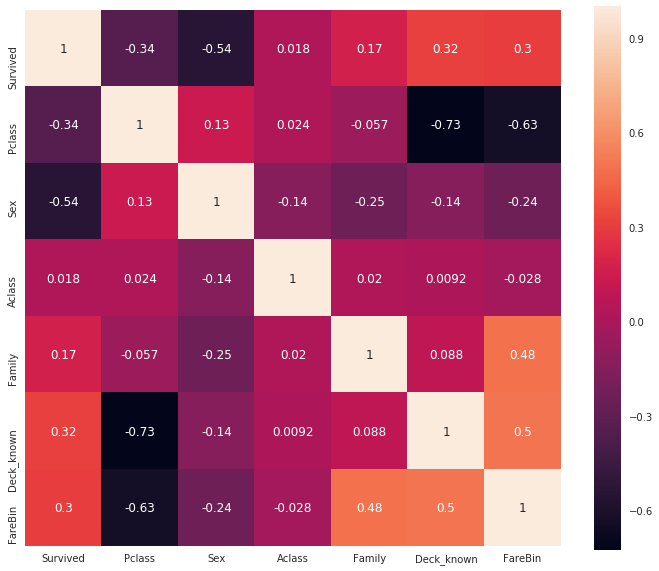

In [76]:
# Correlation between features
ax = plt.subplots( figsize =( 12 , 10 ) )
foo = sns.heatmap(train.corr(), vmax=1.0, square=True, annot=True)

# 4. Predictions

In [77]:
#From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [78]:
# One-Hot Enconding
train_n=pd.get_dummies(train, columns=["Pclass", "Sex","Aclass","Family","FareBin","Deck_known"], prefix=["PC", "Sex","AC","Fam","Fare","DK"])


train_n.head()

,Survived,PC_1,PC_2,PC_3,Sex_0,Sex_1,AC_0,AC_1,AC_2,AC_3,Fam_0,Fam_1,Fam_2,Fam_3,Fare_0,Fare_1,Fare_2,Fare_3,DK_0,DK_1
0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
2,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
4,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0


In [79]:
X=train_n.loc[:,'PC_1':'DK_1']
y=train_n.loc[:,'Survived']

In [80]:
# Splitting the sample into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Modelling

In this part we will train several models using the training set above. 

We will use the following models:

1) Logistic Regression

2) Perceptron

3) Support vector Machine

4) Naive Bayes

5) Decision Tree

6) Random Forest

7) Extra trees Classifier

8) Gradient Boosting Classifier

9) K Neighbors

Instead of using only the training set above, we will use cross-validation, when the training set is split into subsets and each model is trained against a different combination of these subsets and validated against the remaining parts.


In [81]:
clf_log = LogisticRegression()
clf_log = clf_log.fit(X_train,y_train)
#score_log = clf_log.score(X_train,y_train)
score_log = cross_val_score(clf_log, X_train, y_train, cv=5).mean()
print(score_log)

0.80886062468


In [82]:
# Contribution of each feature to the logistic regression model:
pd.DataFrame(list(zip(X_train.columns, np.transpose(clf_log.coef_))))


,0,1
0,PC_1,[0.405326358228]
1,PC_2,[0.206370913627]
2,PC_3,[-0.589130111898]
3,Sex_0,[1.32340053229]
4,Sex_1,[-1.30083337233]
5,AC_0,[-0.0386037701353]
6,AC_1,[1.29274573237]
7,AC_2,[-0.812306530038]
8,AC_3,[-0.419268272243]
9,Fam_0,[0.419969036954]


In [83]:
clf_pctr = Perceptron(
    class_weight='balanced'
    )
clf_pctr = clf_pctr.fit(X_train,y_train)
#score_pctr = clf_pctr.score(X_train,y_train)
score_pctr = cross_val_score(clf_pctr, X_train, y_train, cv=5).mean()
print(score_pctr)

0.71085796211


/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/monique/anac

In [84]:

clf_svm = SVC(
    class_weight='balanced'
    )
clf_svm.fit(X_train, y_train)
#score_svm = clf_svm.score(X_train,y_train)
score_svm = cross_val_score(clf_svm, X_train, y_train, cv=5).mean()
print(score_svm)



0.778395084485


In [85]:
clf_bay = GaussianNB()
clf_bay.fit(X_train,y_train)
#score_bay = clf_bay.score(X_train,y_train)
score_bay = cross_val_score(clf_bay, X_train, y_train, cv=5).mean()
print(score_bay)

0.747865642601


In [86]:
clf_tree = DecisionTreeClassifier(
    #max_depth=3,\
    class_weight="balanced",\
    min_weight_fraction_leaf=0.01\
    )
clf_tree = clf_tree.fit(X_train,y_train)
#score_tree = clf_tree.score(X_train,y_train)
score_tree = cross_val_score(clf_tree, X_train, y_train, cv=5).mean()
print(score_tree)

0.796162416795


In [87]:
clf_rf = RandomForestClassifier(
    n_estimators=1000, \
    max_depth=None, \
    min_samples_split=10 \
    #class_weight="balanced", \
    #min_weight_fraction_leaf=0.02 \
    )
clf_rf = clf_rf.fit(X_train,y_train)
#score_rf = clf_rf.score(X_train,y_train)
score_rf = cross_val_score(clf_rf, X_train, y_train, cv=5).mean()
print(score_rf)

0.800937019969


In [88]:
clf_ext = ExtraTreesClassifier(
    max_features='auto',
    bootstrap=True,
    oob_score=True,
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10
    #class_weight="balanced",
    #min_weight_fraction_leaf=0.02
    )
clf_ext = clf_ext.fit(X_train,y_train)
#score_ext = clf_ext.score(X_train,y_train)
score_ext = cross_val_score(clf_ext, X_train, y_train, cv=5).mean()
print(score_ext)



0.805762826421


In [89]:
import warnings
warnings.filterwarnings("ignore")

clf_gb = GradientBoostingClassifier(
            #loss='exponential',
            n_estimators=1000,
            learning_rate=0.1,
            max_depth=3,
            subsample=0.5,
            random_state=0).fit(X_train, y_train)
clf_gb.fit(X_train,y_train)

#score_gb = clf_gb.score(X_train,y_train)
score_gb = cross_val_score(clf_gb, X_train, y_train, cv=5).mean()
print(score_gb)

0.812124731183


In [90]:
clf_knn = KNeighborsClassifier(
    n_neighbors=10,
    weights='distance'
    )
clf_knn = clf_knn.fit(X_train,y_train)
#score_knn = clf_knn.score(X_train,y_train)
score_knn = cross_val_score(clf_knn, X_train, y_train, cv=5).mean()
print(score_knn)

0.804188428059


In [91]:
# Models used in the analysis ordered by accuracy
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Gradient Boosting',  
              'Decision Tree','ExtraTree','Perceptron', 'Naive Bayes'],
    'Score': [score_svm, score_knn, score_log, score_rf, score_gb, 
              score_tree,score_ext,score_pctr, score_bay]})
models.sort_values(by='Score', ascending=False)



,Model,Score
4,Gradient Boosting,0.812125
2,Logistic Regression,0.808861
6,ExtraTree,0.805763
1,KNN,0.804188
3,Random Forest,0.800937
5,Decision Tree,0.796162
0,Support Vector Machines,0.778395
8,Naive Bayes,0.747866
7,Perceptron,0.710858


The Table above ranks the classifiers according to the accuracy. We can see that the largest accuracy is obtained by the Gradient Boosting classifier. 

### 4.2 Hyper-parameters

Now that we selected the classifier to be used with our sample, Gradient Boosting, we will start a grid search algorithm to find the best parameters to run our classifier. 

In [107]:
warnings.filterwarnings("ignore")
clf_gb = GradientBoostingClassifier()
param_grid = {"loss" : ["deviance"],
              "n_estimators" : [1000,2500],
              "learning_rate" : [0.1,0.25],
              "max_depth" : [3,5,8],
              "subsample" : [0.2,0.5,1.0],
              "min_samples_leaf" : [1, 5, 10]}
gs = GridSearchCV(estimator=clf_gb, param_grid=param_grid, scoring='accuracy', cv=3)
gs = gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)


0.805778491172
{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 1000, 'subsample': 0.2}


In [108]:
# Runningthe classifier with the best parameters:
clf_gb = GradientBoostingClassifier(
            n_estimators=1000,
            learning_rate=0.1,
            max_depth=3,
            subsample=0.2,
             min_samples_leaf=5).fit(X_train, y_train)
clf_gb.fit(X_train,y_train)

score_gb = clf_gb.score(X_train,y_train)
print(score_gb)

0.860353130016


In [118]:
# Predictions using best classifier on the test sample
y_pred = clf_gb.predict(X_test)
score_gb_test = clf_gb.score(X_test,y_test)
print(score_gb_test)

0.824626865672


In [116]:
# Getting confusion matrix for the best classifier
conf=confusion_matrix(y_test, y_pred)

Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.21  0.79]]


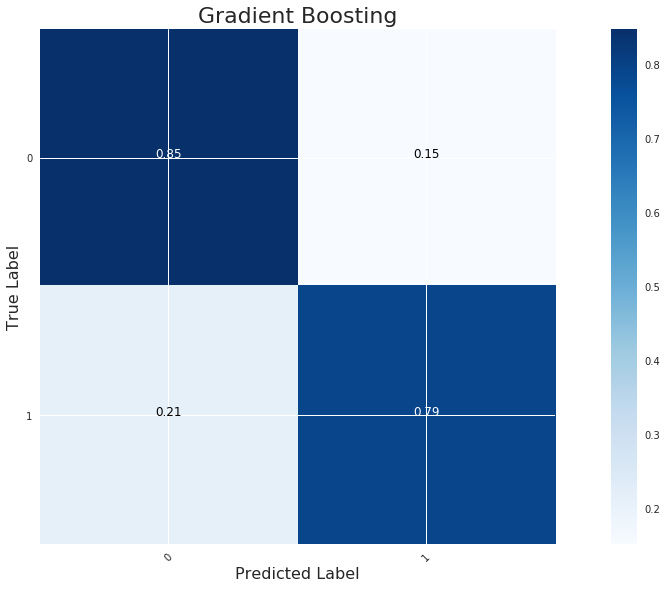

In [117]:
class_names=[0,1]
np.set_printoptions(precision=2)

f,ax=plt.subplots(figsize=(16,8))
plot_confusion_matrix(conf, classes=class_names, normalize=True)
ax.set_title('Gradient Boosting',fontsize=22)
ax.set_xlabel('Predicted Label',fontsize=16)
ax.set_ylabel('True Label',fontsize=16)
plt.show()

We can see in the Figure above that we were able to correctly classify 85% of those who died in the Titanic and 79% of those who survived the disaster. 

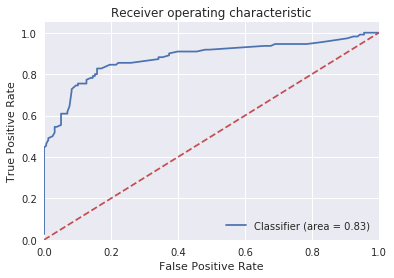

In [119]:
logit_roc_auc = roc_auc_score(y_test, clf_ext.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [114]:
print(classification_report(y_test, y_pred_log))

             precision    recall  f1-score   support

          0       0.85      0.85      0.85       158
          1       0.78      0.79      0.79       110

avg / total       0.82      0.82      0.82       268



# 5. Conclusion

We used the file **train.csv** from kaggle.com to predict who survived or not the Titanic.

In the exploratory analysis, we attempted to identify those features with more information on the chances of survival. We, then, applied several machine learning classifier to make predictions.

We selected the "best" classifier based on its accuracy and tunned the hyper parameters in order to obtain the best parameters for that particular model. We were able to get an accuracy of 0.83 on the test set and were able to correctly predict 79% of the survivals and 85% of the dead. 